# Ready for your first Kaggle competition?

Kaggle is a popular platform that hosts machine learning competitions.

The platform helps users to interact via forums and shared code, fostering both collaboration and competition.

1. Go to the Kaggle competition [website](https://www.kaggle.com/competitions).
2. Register for an account (it's free).
3. Find the __House Prices - Advanced Regression Techniques__
4. Go to the Data tab, read the description, download the data.

## Inspect the data

Use pandas python package read the csv files and inspect the data: 
* How many examples? 
* How many features?
* Are there non-numerial values? If so how do you handle these cases?
* Are there NaNs? and if so how do you handle such cases?

In [2]:
import pandas as pd

raw_train = pd.read_csv('train.csv')
raw_val = pd.read_csv('test.csv')
raw_train.shape, raw_val.shape
# Useful tools:
# df.hist()
# df.head()

((1460, 81), (1459, 80))

In [3]:
raw_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- There are 1460 instances in the training set.
- There are 81 features.
- Features with missing values: 
    1. LotFrontage (float64)
    2. Alley (object)
    3. MasVnrType (object)
    4. MasVnrArea (float64)
    5-8. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 (object)
    9. BsmtFinType2 (object)
    10. Electrical (object)
    11. FireplaceQu (object)
    12-16. GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond (object, float64, object, object, object)
    17. PoolQC (object)
    18. Fence (object)
    19. MiscFeature (object)


In [4]:
raw_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
raw_train['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [17]:
raw_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

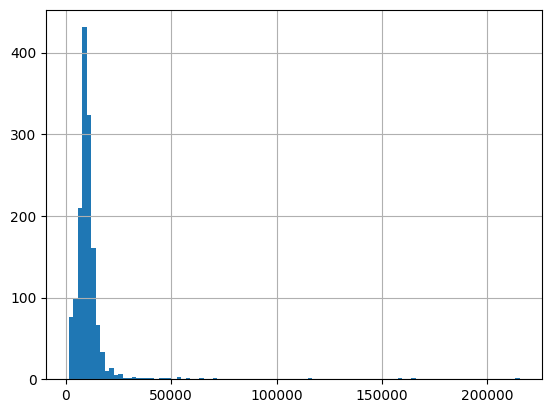

In [5]:
raw_train['LotArea'].hist(bins=100)

In [6]:
# extra code – code to save the figures as high-res PNGs for the book
import matplotlib.pyplot as plt
from pathlib import Path
IMAGES_PATH = Path() / "images" / "kaggle_challenge"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

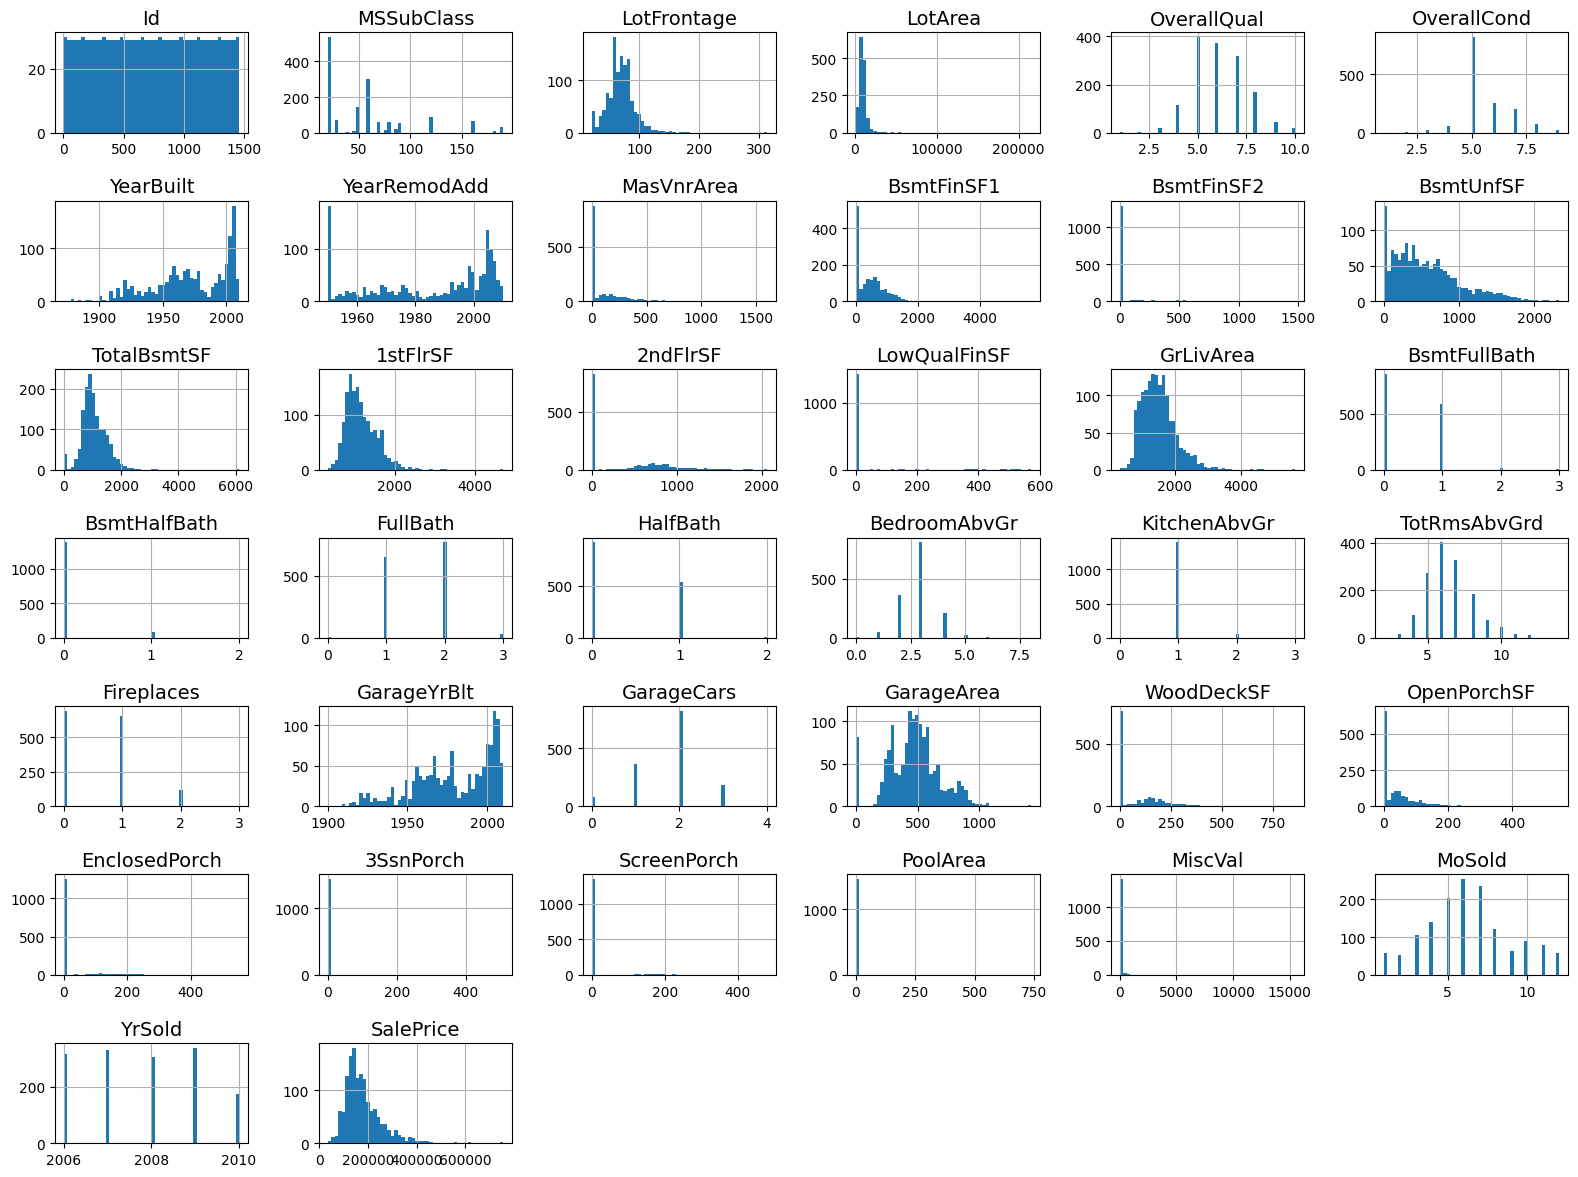

In [7]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

raw_train.hist(bins=50, figsize=(16, 12))
save_fig("training_histogram_plots")  # extra code
plt.show()

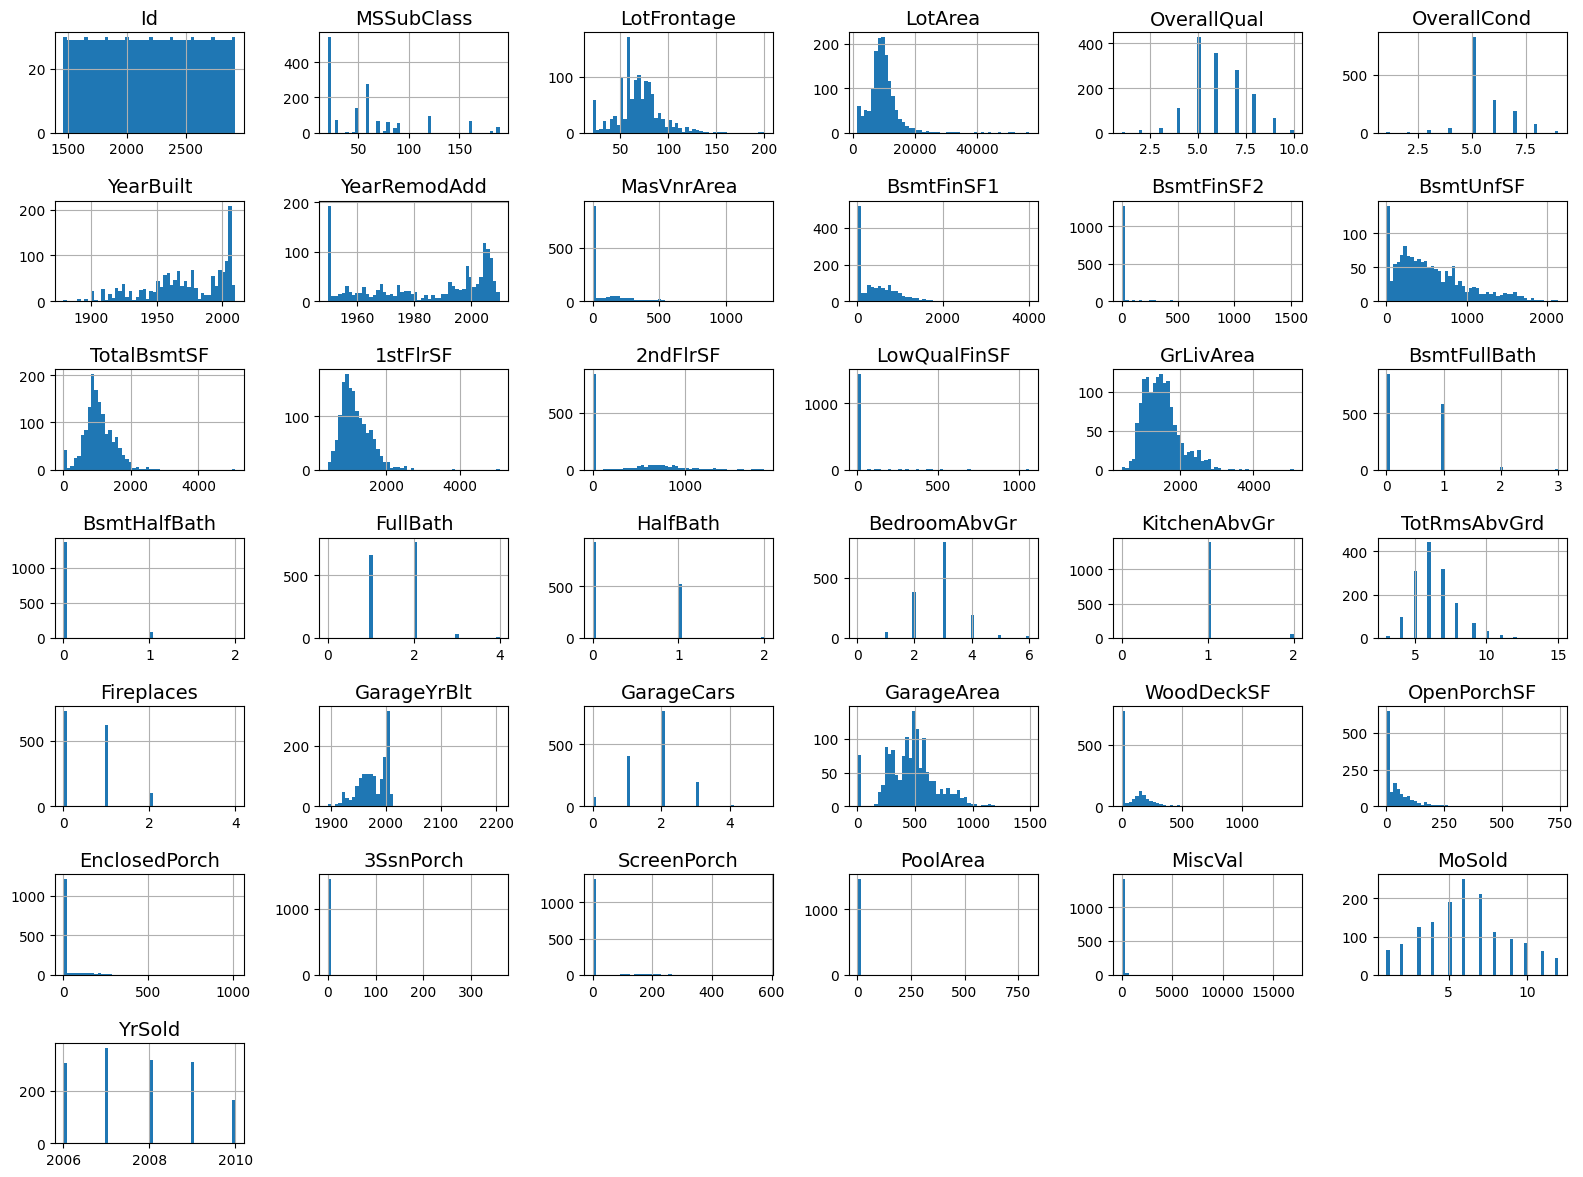

In [8]:
raw_val.hist(bins=50, figsize=(16, 12))
save_fig("val_histogram_plots")  # extra code
plt.show()

### Handling numerical attributes (missing datas)
- Handling NA values by setting missing values to the mean -> imputation

In [19]:
features = pd.concat(
    (raw_train.drop(columns=['Id', 'SalePrice']),
     raw_val.drop(columns='Id')))
print(features.shape)

(2919, 79)


In [21]:
# standardize numerical features
numerical_features = features.dtypes[features.dtypes != 'object'].index
numerical_features, numerical_features.shape

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'],
       dtype='object'),
 (36,))

In [24]:
features[numerical_features] = features[numerical_features].apply(
                                lambda x: (x - x.mean()) / (x.std()))
features[numerical_features] = features[numerical_features].fillna(0)

In [25]:
# Handling text and categorical attributes by using OneHotEncoder
features = pd.get_dummies(features, dummy_na=True)


## Class to load the Training, Validation and Test sets.

In [ ]:
import torch
from d2l import torch as d2l

class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            # read the csv files:
            self.raw_train = # ?????
            self.raw_test = # ?????

    def preprocess(self, train_frac=0.8):
        """All the things you noticed about the data that needs preprocessing 
           can be addressed here.
        """
        label_col_name = ""
        # We remove SalePrice (for the moment, as we do not want any pre-processing for it) and Id (for us it is useless)
        # Useful tools: df.drop()
        features_train = # Remove Id and label_col_name
        features_test = # Remove Id

        # Now the actual pre-processing step. We need to:
        # - Handle NaN in numerical variables (there are multiple options, think which is best according to the dataset)
        # - Standardize or normalize the numerical variables
        # - Handle categorical features
        # - Something else? Inspect the dataset at every step!
        # NB: It could be useful to temporarely merge train and test set, why?
        # Useful tools: df.dtypes, df.index, df.apply(), pd.get_dummies(), df.copy()

        # Finalize pre-processing and separate train and val set
        final_train = # Re-allocate the labels variable
        
        self.train = # Final train set
        self.val = # Final validation set
        self.test = # Final test set
        print('Train shape:', self.train.shape)
        print('Val shape:', self.val.shape)
        print('Test shape:', self.test.shape)

        # Sanity check: train and test must have the same number of features.

    def get_dataloader(self, train):
        """Define the data tensor (features tensor, labels tensor reshaped appropriately (i.e. (-1, 1))).
           Note: all the examples need ot be tensors so you need to pass the numpy arrays to torch.tensor.
           Note: Better taking the Logarithm of prices."""
        
        label = "SalePrice"
        data = self.train if train else self.val
        
        if label not in data: 
            return
        else:
            features = # Drop labels again
            labels = # But save them aside
            tensors = (features, labels)
            
        return self.get_tensorloader(tensors, train)

In [ ]:
data = KaggleHouse(batch_size=64)

In [ ]:
# Insert some prints in the preprocess function so that you can verify everything is as expected
data.preprocess()

In [ ]:
# Test the data loader: check features and labels dimensions.
data.get_dataloader(train=True)

## Training

In [ ]:
# Here you could define your own regression model. 

In [ ]:
# This function is complete: if you have done everything correctly this should work without modify anything
def your_training(trainer, data, lr=0.01):
    # Get the training dataloader
    train_loader = data.get_dataloader(train=True)

    model = d2l.LinearRegression(lr) # Initialize the model
    model.board.yscale='log'         # iterative loss plot

    trainer.fit(model, data)         # fit model to data

    return model                     # return the model

In [ ]:
# define the trainer (we can use the built in d2l.Trainer)
trainer = d2l.Trainer(max_epochs=20)
your_model = your_training(trainer, data, lr=0.01)

## Evaluate your model on the Test set

In [ ]:
testset = # remember that "data" contains also the preprocessed testset
your_predictions = your_model(torch.tensor(testset, dtype=torch.float32))
# NOTE: we trained the model to predict  the log of the labels.
preds_exp = 10**your_predictions.detach().numpy()

## Now save your predictions in a csv file

Read carefully the format they want the predction to be and create the csv file accordingly.

They want two columns, comma separated values, 'Id' and 'SalePrice'

In [ ]:
submission = # Create the predictions dataset

submission.to_csv('./solutions/my_submission_solution.csv', index=False)

## Submit your predition to the Kaggle competition and see your score!